<h3>Задание 2. Бифуркационный анализ системы ОДУ

**Модель №2**  

Заданная вариантом модель описывается следующей нелинейной системой ОДУ:  
  
<div style="text-align: center">

$\begin{cases}
{dx \over dt} = k_1z - k_{-1}x - k_2z^2x, 
\\
{dy \over dt} = k_3z^2 - k_{-3}y,
\end{cases}$  

</div>
  
где $z = 1 - x - 2y$.


Система рассматривается на фазовом пространстве S:  
<div style="text-align: center">  

$S = \left\{0 \le x \le 1, 0 \le y \le 0.5, 0 \le x + 2y \le 1 \right\}$  
</div> 


**Постановка задачи однопараметрического анализа:**
1. Используя аналитические методы продолжения по параметру, построить зависимость  
стационарных решений $x_c$ и $y_c$ от параметра $k_1$ ($k_2$) для нескольких значений  
параметра $k_{-1}$: {0.001, 0.005, 0.01, 0.015, 0.02}  
2. Используя аналитические методы продолжения по параметру, построить зависимость  
стационарных решений $x_c$ и $y_c$ от параметра $k_1$ ($k_2$) для нескольких значений  
параметра $k_{-3}$: {0.0005, 0.001, 0.002, 0.003, 0.004}
3. Исследуя след и определитель матрицы Якоби на стационаре, найти точки  
бифуркаций, уточнить их и отметить на графиках.

In [172]:
from sympy import symbols, Symbol, solve, Eq, lambdify
import numpy as np

# Определение символьных переменных
x, y, z = symbols('x y z')
k1 = Symbol("k1")
k1m = Symbol("k1m")
k2 = Symbol("k2")
k3 = Symbol("k3")
k3m = Symbol("k3m")

**1. Анализ поведения стационарного решения $x_c(k_1)$ и $y_c(k_1)$ в зависимости от параметра $k_1$ при различных $k_{-1}$.**   

Стационарное решение $x_c(k_1)$ и $y_c(k_1)$ определяется как решение нелинейной системы  
<div style="text-align: center">  

$\begin{cases}
k_1z - k_{-1}x - k_2z^2x = 0, 
\\
k_3z^2 - k_{-3}y = 0.
\end{cases}$  
</div>  

Иногда прямую зависимость $x_c(k_1)$ и $y_c(k_1)$ найти не удается, тогда используется алгоритм продолжения решения по параметру.
 


In [173]:
# Определение символьных выражений
z = 1 - x - 2*y
f1 = k1 * z  - k1m * x - k2 * z**2 * x
f2 = k3 * z**2 - k3m * y

Символьное решение стационарной системы

In [174]:
# Создание и решение однородной системы уравнений
system = [Eq(f1, 0), Eq(f2, 0)]
solutions = solve(system, (x, k1)) 

Ниже приведены две пары решений системы $x(y)$ и $k_1(y)$

In [175]:
solutions[0][0]

-2*y + 1 - sqrt(k3**3*k3m*y)/k3**2

In [176]:
solutions[0][1]

-(k1m*k3 + k2*k3m*y)/k3 - sqrt(k3**3*k3m*y)*(2*y - 1)*(k1m*k3 + k2*k3m*y)/(k3**2*k3m*y)

In [177]:
solutions[1][0]

-2*y + 1 + sqrt(k3**3*k3m*y)/k3**2

In [178]:
solutions[1][1]

-(k1m*k3 + k2*k3m*y)/k3 + sqrt(k3**3*k3m*y)*(2*y - 1)*(k1m*k3 + k2*k3m*y)/(k3**2*k3m*y)

In [179]:
x_sol0 = solutions[0][0]
k1_sol0 = solutions[0][1]
x_sol1 = solutions[1][0]
k1_sol1 = solutions[1][1]

x_func0 = lambdify((y, k3, k3m), x_sol0)
x_func1 = lambdify((y, k3, k3m), x_sol1)
k1_func0 = lambdify((y, k1m, k2, k3, k3m), k1_sol0)
k1_func1 = lambdify((y, k1m, k2, k3, k3m), k1_sol1)


В данном случае удалось построить решение $x(y)$ и $k_1(y)$, следовательно применяется алгоритм продолжения по параметру.  
Считая $y$ независимой переменной, по набору $\left\{y_k: 0 = y_0 \le y_1 \le ... \le y_N = 0.5 \right\}$ определим значения параметра $k_1(y_k)$  
и переменной $x(y_k)$.
 

In [180]:
# Зависимость стационарных решений от k1
k1m_vals = [0.001, 0.005, 0.01, 0.015, 0.02] 
k2val = 2.5
k3m_val = 0.001
k3val = 0.0032

y_k = np.linspace(0.001, 0.5, 100) #y=0 не решение(в знаменателе 0)


Ниже приведены графики $x_c(k_1)$ и $y_c(k_1)$ - зависимостей стационарного решения исходной системы от параметра $k_1$,  
при различных значениях параметра $k_{-1}$. Учтено, что решение рассматривается на фазовой плоскости $S$.  
Интерес представляет первая пара стационарных решений - на ней присутствуют точки бифуркации.

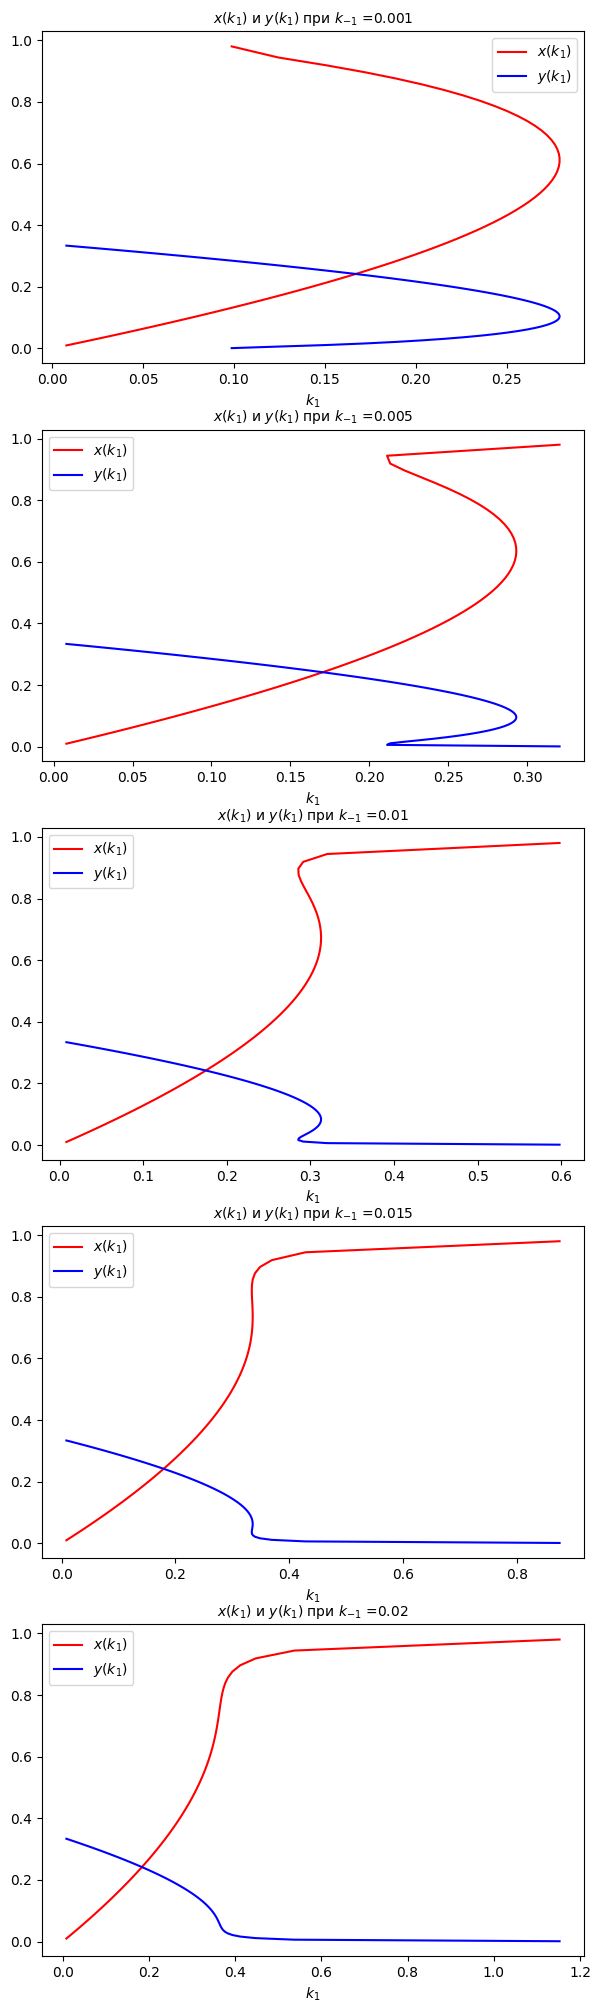

In [181]:
import matplotlib.pyplot as plt

# Построение графиков
plt.figure(figsize=(7, 25))
plt.rc('axes', titlesize= 10)

for i in range(len(k1m_vals)):
    x_val = x_func0(y_k, k3val, k3m_val)
    k1_val = k1_func0(y_k, k1m_vals[i], k2val, k3val, k3m_val)

    x_val, y_permis, k1_val = zip(*[(x, y, z) for x, y, z in zip(x_val, y_k, k1_val) if 0 <= x <= 1])
    
    # Построение графиков x0, y1
    plt.subplot(5, 1, i + 1)
    plt.plot(k1_val, x_val, color = 'red', label='$x(k_1)$')
    plt.plot(k1_val, y_permis, color = 'blue', label='$y(k_1)$')
    plt.title('$x(k_1)$ и $y(k_1)$ при $k_{-1}$ =' + str(k1m_vals[i]))
    plt.xlabel('$k_1$')
    plt.legend(['$x(k_1)$', '$y(k_1)$'])

plt.show()

**2. Анализ поведения стационарного решения $x_c(k_1)$ и $y_c(k_1)$ в зависимости от параметра при различных $k_{-3}$**   

Проведем аналогичные вычисления зависимостей $x_c(k_1)$ и $y_c(k_1)$ - стационарного решения от параметра $k_1$,  
при различных значениях параметра $k_{-3}$: {0.0005, 0.001, 0.002, 0.003, 0.004}. Ниже приведены соответсвующие графики. 

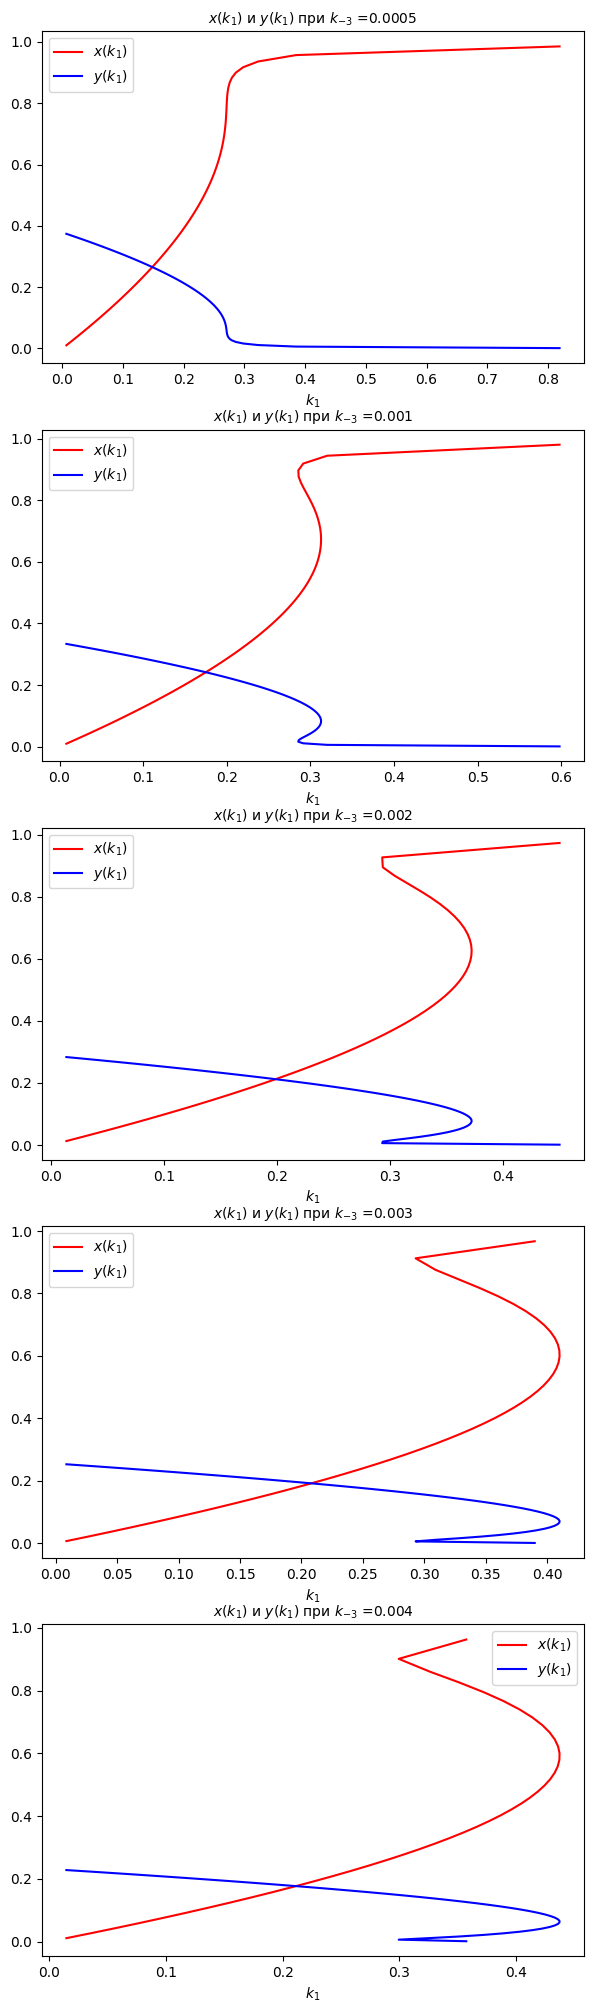

In [182]:
# Зависимость стационарных решений от k1
k1m_val = 0.01 
k2val = 2.5
k3m_vals = [0.0005, 0.001, 0.002, 0.003, 0.004]
k3val = 0.0032

# Построение графиков
plt.figure(figsize=(7, 25))
plt.rc('axes', titlesize= 10)

for i in range(len(k3m_vals)):
    x_val = x_func0(y_k, k3val, k3m_vals[i])
    k1_val = k1_func0(y_k, k1m_val, k2val, k3val, k3m_vals[i])

    x_val, y_permis, k1_val = zip(*[(x, y, z) for x, y, z in zip(x_val, y_k, k1_val) if 0 <= x <= 1])
    
    # Построение графиков x0, y0
    plt.subplot(5, 1, i + 1)
    plt.plot(k1_val, x_val, color = 'red', label='$x(k_1)$')
    plt.plot(k1_val, y_permis, color = 'blue', label='$y(k_1)$')
    plt.title('$x(k_1)$ и $y(k_1)$ при $k_{-3}$ =' + str(k3m_vals[i]))
    plt.xlabel('$k_1$')
    plt.legend(['$x(k_1)$', '$y(k_1)$'])

plt.show()


**3. Нахождение точек бифуркации и их уточнение.**   

Определим, при каких значениях параметра $k_1$ происходит бифуркация одного из стационарных решений $x(k_1)$, $y(k_1)$.  
Для этого необходимо проанализировать собственные значения матрицы Якоби на стационаре при каждом значении параметра. 

In [183]:
from sympy import Matrix
import sympy

F = Matrix([f1, f2])
A = F.jacobian([x, y])
detA = A.det()

# Функция определителя
detA_func = lambdify((x, y, k1, k1m, k2, k3, k3m), detA)

**Критерии наличия точки бифуркации**

Бифуркация происходит вблизи устойчивого стационарного состояния: все собственные значения имеют отрицательные действительные части.  
  
Обозначим $f(y)$ - маркировочная функция - определитель матрицы Якоби. Здесь $y$ - независимая переменная, через которую удалось выразить все остальные неизвестные исходной системы и исследуемый параметр $k_1$: $x(y)$ и $k_1(y)$. На очередном шаге независимой переменной $y$ у "маркировочной" функции проиходит изменение знака. В качестве приближенной точки бифуркации будем брать то значение исследуемого параметра, которому соответствует линейное приближение $f(y)$ в точке смены знака:  

<div style="text-align: center">

$f(y) = f(y_i) + \frac{f_{i+1} - f_i}{y_{i+1} - y_i} * (y - y_i)$  

</div>

Отсюда легко выражается значение независимосй переменной на критическом параметре и, далее, сам параметр.

In [241]:
# Определение k1, при которых есть бифуркация
def get_bief(x, y, k1_vals, k1m_val, k2val, k3val, k3m_val):
    k1_bif = []
    y_bif = []
    x_bif = []

    #Определитель
    detA_vals = [detA_func(x[i], y[i], k1_vals[i], k1m_val, k2val, k3val, k3m_val) for i in range(len(x))]

    for i in range(len(y) - 1):
        # Анализ определителя матрицы
        if (detA_vals[i] * detA_vals[i + 1] < 0 or detA_vals[i] == 0):
            # Линейное приближение точки бифуркации
            tmp_y = y[i] - detA_vals[i] * (y[i + 1] - y[i]) / (detA_vals[i + 1] - detA_vals[i])
            k1_tmp = k1_func0(tmp_y, k1m_val, k2val, k3val, k3m_val)
            x_tmp = x_func0(tmp_y, k3val, k3m_val)
            y_bif.append(tmp_y)
            x_bif.append(x_tmp)
            k1_bif.append(k1_tmp)

    return k1_bif, y_bif, x_bif

Ниже приведены графики стационарного решения в зависимости от параметра $k_1$ на фазовой плоскости $S$ для различных значений параметра $k_{-3}$.  
На графиках отмечены найденные численно точки бифуркации 

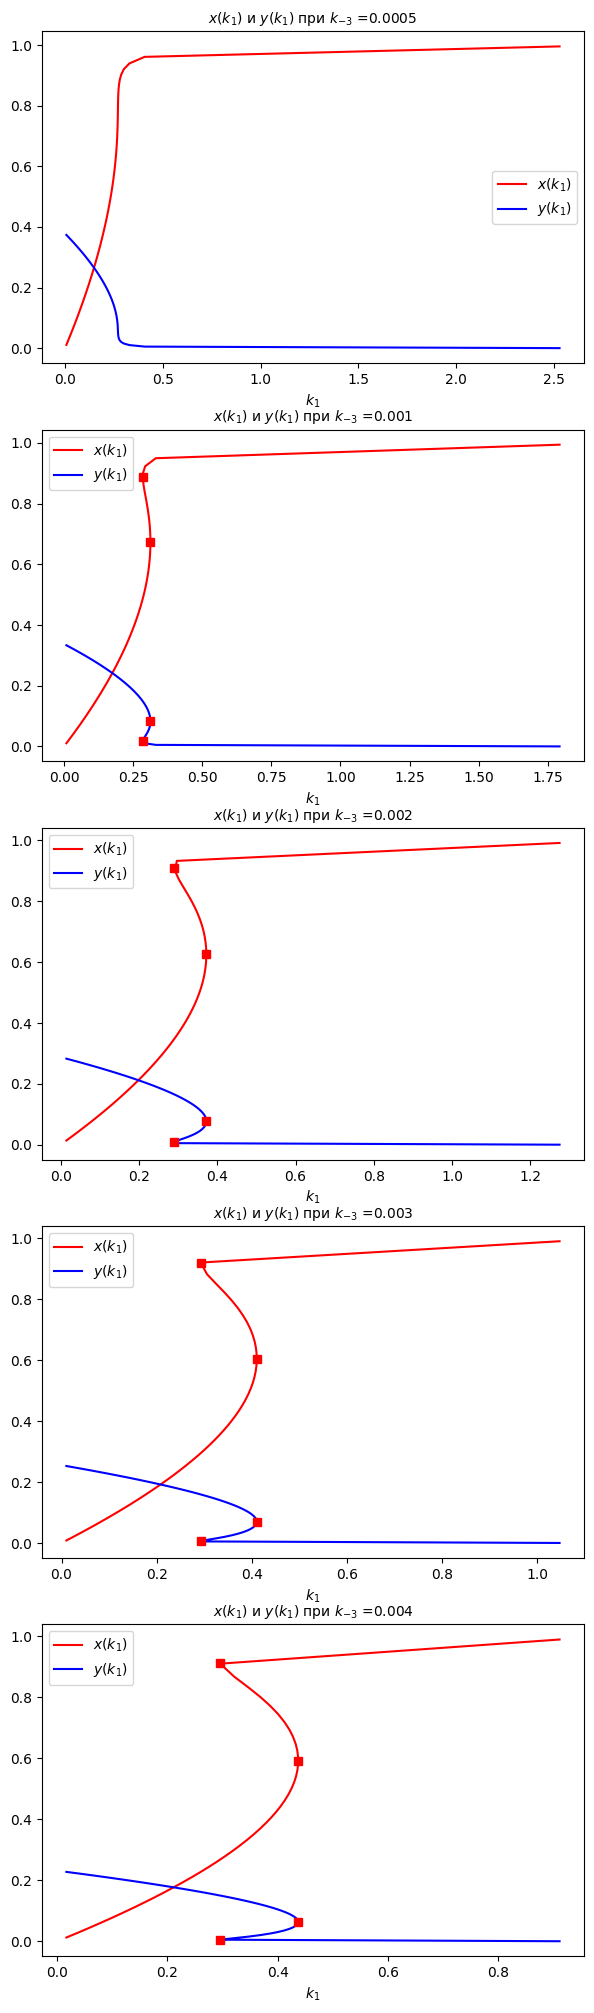

In [239]:
# Инициализация параметров
k1m_val = 0.01 
k2val = 2.5
k3m_vals = [0.0005, 0.001, 0.002, 0.003, 0.004]
k3val = 0.0032

#Независимая переменная
y_k = np.linspace(0.0001, 0.5, 100) #при 0 решение не определено


# Построение графиков
plt.figure(figsize=(7, 25))
plt.rc('axes', titlesize= 10)

for j in range(len(k3m_vals)):
    # Стационарное решение 
    x_val = x_func0(y_k, k3val, k3m_vals[j])
    k1_val = k1_func0(y_k, k1m_val, k2val, k3val, k3m_vals[j])

    # Рассматриваем на заданной фазовой плоскости
    x_val, y_permis, k1_val = zip(*[(x, y, z) for x, y, z in zip(x_val, y_k, k1_val) if 0 <= x <= 1])
    
    # Определение k1, при которых есть бифуркация
    k1_bif, y_bif, x_bif = get_bief(x_val, y_permis, k1_val, k1m_val, k2val, k3val, k3m_vals[j])
    

    # Построение графиков x0, y0
    plt.subplot(5, 1, j + 1)
    plt.plot(k1_val, x_val, color = 'red', label='$x(k_1)$')
    plt.plot(k1_val, y_permis, color = 'blue', label='$y(k_1)$')
    plt.plot(k1_bif, y_bif, 'rs')
    plt.plot(k1_bif, x_bif, 'rs')
    plt.title('$x(k_1)$ и $y(k_1)$ при $k_{-3}$ =' + str(k3m_vals[j]))
    plt.xlabel('$k_1$')
    plt.legend(['$x(k_1)$', '$y(k_1)$'])

plt.show()